In [1]:
import pkufiber as pf
import pkufiber.dsp.adaptive_filter as adf
import jax.numpy as jnp, jax, matplotlib.pyplot as plt
from pkufiber.data.loader import FiberDataset

data = FiberDataset('/home/xiaoxinyu/TorchFiber/dataset_A800/train.h5', Nch=[21], Rs=[80], Pch=[2], Nmodes=2,
                window_size=50000, strides=1, num_window=1, truncate=0, Tx_window=True, pre_transform='Rx_DBP64')

Rx,Tx,info = data[0]

print(Rx.shape, Tx.shape, info.shape)

import numpy as np
const = np.unique(Tx)
print('length of const:', len(const))

TypeError: __init__() got an unexpected keyword argument 'num_window'

# 1. mimoaf

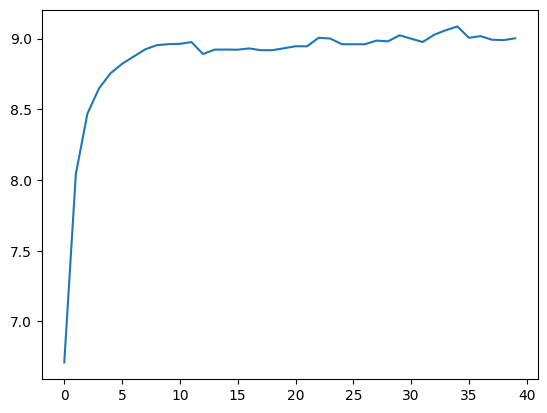

In [2]:
z = adf.mimoaf(jnp.array(Rx),  jnp.array(Tx))
a,b = jax.device_get(z.val), Tx[z.t.start:z.t.stop].numpy()

plt.plot(pf.qfactor_path(a, b, stride=1000))

array([<Axes: >, <Axes: >], dtype=object)

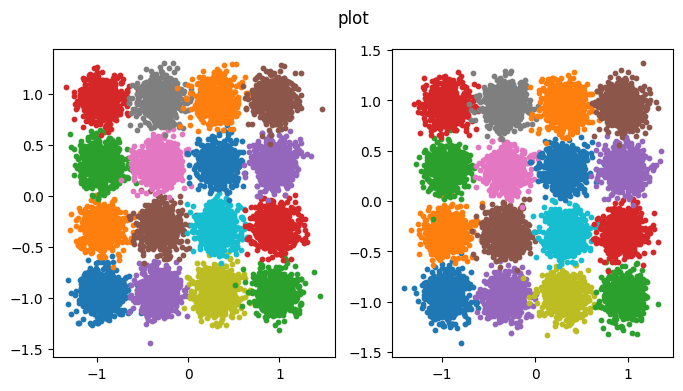

In [7]:
pf.show_symb(a[20000:30000], b[20000:30000], title='plot')

# 2. cpr

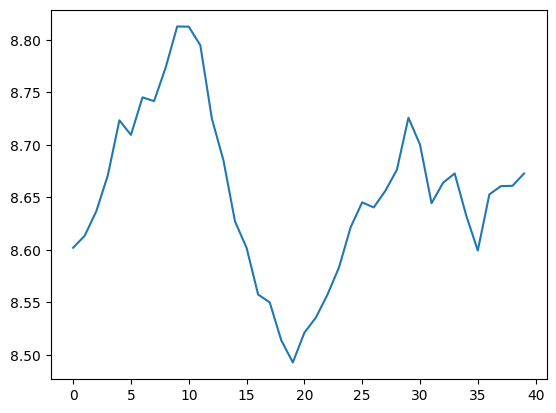

In [15]:
z,_,_ = adf.bps(jnp.array(Rx)[::2], const, N=40, B=101)
a,b = jax.device_get(z), Tx.numpy() 

plt.plot(pf.qfactor_path(a, b, stride=1000))

array([<Axes: >, <Axes: >], dtype=object)

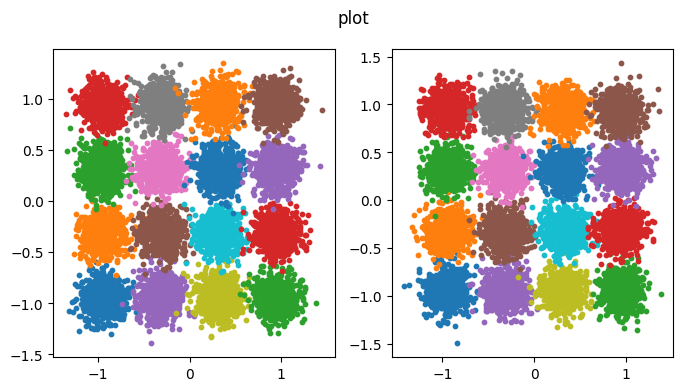

In [18]:
pf.show_symb(a[20000:30000], b[20000:30000], title='plot')